# Global Precipitation Measurement (GPM)

A range of GPM products are provided by the ``pansat.products.satellite.gpm`` module.

In [1]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

## 1C GMI remapped

The GMI 1C-R (remapped) product contains the brightness temperatures from the GMI sensor mapped to a common swath. The brightness temperatures of the different channels can be accessed via the ``tbs_1`` and ``tbs_2`` variables, which contain the lower and higher frequency channels, respectively.

In [16]:
from pansat.products.satellite.gpm import l1c_gpm_gmi_r
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)
files = l1c_gpm_gmi_r.download(t_0, t_1)

### Example

To exemplify this, the two code cells below generate a plot of the swath of the lowest channel of the GMI sensor. This channels corresponds to the first element of the ``tbs_1`` variable of the data.

In [17]:
import numpy as np
from h5py import File
dataset = l1c_gpm_gmi_r.open(files[0])
lats = dataset["latitude"]
lons = dataset["longitude"]
tbs_1 = dataset["tbs_1"]

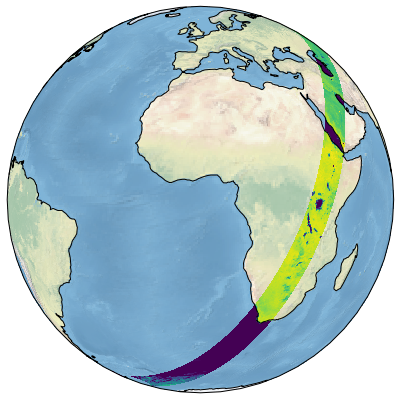

In [18]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = Normalize(100, 300)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_longitude=lons.mean(),
                                central_latitude=lats.mean())
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
ax.pcolormesh(lons, lats, tbs_1[:, :, 1], transform=ccrs.PlateCarree(), norm=norm)

## 1C Metop-B MHS

The ``l1c_metopb_mhs`` is another level 1 product, which provides the calibrated brightness temperatures of the MHS sensor onboard Metop-B.

In [19]:
from pansat.products.satellite.gpm import l1c_metopb_mhs
t_0 = datetime(2016, 11, 24, 10)
t_1 = datetime(2016, 11, 24, 12)
files = l1c_metopb_mhs.download(t_0, t_1)

In [20]:
dataset = l1c_metopb_mhs.open(str(files[0]))
lats = dataset["latitude"]
lons = dataset["longitude"]
tbs = dataset["tbs"].data

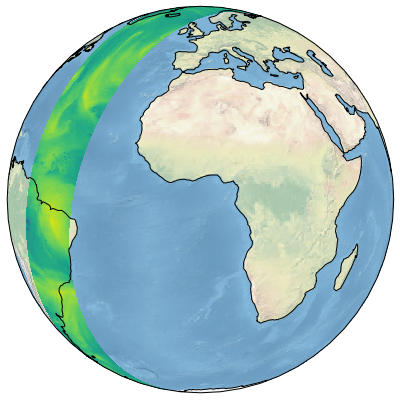

In [21]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_longitude=lons.mean(),
                                central_latitude=lats.mean())
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
ax.pcolormesh(lons, lats, tbs[:, :, 2], transform=ccrs.PlateCarree())

## 2A GPROF GMI

The level 2 GPROF product contain the precipitation retrieved from the passive sensors of the GPM constellation using the GPROF algorithm. The ``l2a_gprof_gpm_gmi`` product provides the precipitation retrieved from the GMI sensor onboard the GPM Core Observatory.

In [23]:
from pansat.products.satellite.gpm import l2a_gprof_gpm_gmi
files = l2a_gprof_gpm_gmi.download(t_0, t_1)

In [24]:
dataset = l2a_gprof_gpm_gmi.open(str(files[0]))
lats = dataset["latitude"]
lons = dataset["longitude"]
precip = dataset["surface_precipitation"]

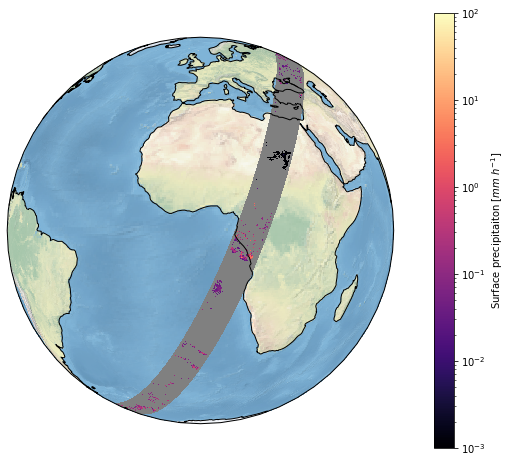

In [25]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=lats.mean(),
                                central_longitude=lons.mean())
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.pcolormesh(lons, lats, precip, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()

## 2A GPROF Metop-B MHS

The ``l2a_gprof_metopb_mhs`` product provides the precipitation retrieved from the MHS sensor onboard the Metop-B satellite.

In [11]:
from pansat.products.satellite.gpm import l2a_gprof_metopb_mhs
files = l2a_gprof_metopb_mhs.download(t_0, t_1)

In [12]:
dataset = l2a_gprof_gpm_gmi.open(files[0])
lats = dataset["latitude"]
lons = dataset["longitude"]
precip = dataset["surface_precipitation"]

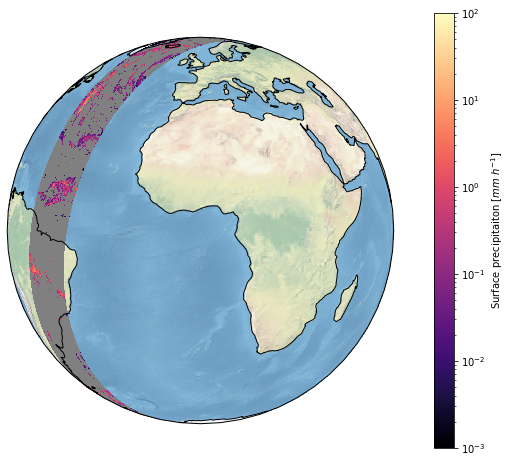

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=lats.mean(),
                                central_longitude=lons.mean())
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.pcolormesh(lons, lats, precip, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()

## 2B combined product

The level 2 combined producte provides surface precipitation values that were retrieved using the radar and passive signals together. Since they depende on the radar the data is provide on a much thinner swath albeit at a higher resolution of around 5 km.

In [26]:
from pansat.products.satellite.gpm import l2b_gpm_cmb
files = l2b_gpm_cmb.download(t_0, t_1)

In [29]:
dataset = l2b_gpm_cmb.open(files[0])
lats = dataset["latitude"]
lons = dataset["longitude"]
precip = dataset["surface_precipitation"]

In [31]:
files[0]

PosixPath('GPM/2B.GPM.DPRGMI.2HCSHv4-1.20161124-S113145-E130417.015571.V06A.HDF5')

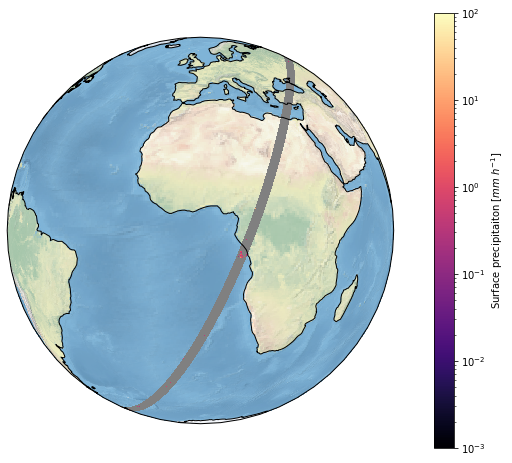

In [30]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=lats.mean(),
                                central_longitude=lons.mean())
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.pcolormesh(lons, lats, precip, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()